<a href="https://colab.research.google.com/github/gpquintero1/ProyectoGrado/blob/main/Base_AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis exploratorio base AMZN**

A continuación se presenta un análisis exploratorio de datos sobre la serie de tiempo financiera de precios de la acción AMZN hasta el 2022.

In [ ]:
# Se cargan las librerías que se van a utilizar

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from random import random
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.ar_model import AutoReg
!pip install arch
import arch
from arch import arch_model
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
# Personalización de parámetros para todas las gráficas
plt.rcParams["figure.figsize"] = [16, 5]
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["lines.markerfacecolor"] = "purple"
plt.rcParams["lines.markeredgecolor"] = "purple"
plt.rcParams["lines.markersize"] = 6
plt.rcParams["patch.facecolor"] = "purple"
plt.rcParams["patch.edgecolor"] = "purple"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importación de la información desde Drive
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datos/AMZN.csv", sep=",", header=0)

# Ajuste de la columna date en formato datetime
data['Date'] = pd.to_datetime(data['Date'])

# Establecer la columna de fecha como índice
data.set_index('Date', inplace=True)

# Visual
data.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
2020-01-02,93.21,93.75,80.72,94.90,94.90,94.90
2020-01-03,93.22,93.22,75.33,94.31,93.75,93.75
2020-01-06,93.00,93.00,81.31,95.18,95.14,95.14
2020-01-07,94.60,95.22,82.68,95.69,95.34,95.34
2020-01-08,94.32,94.90,70.24,95.55,94.60,94.60


In [ ]:
# Dimensiones del data set inicial
dimension = data.shape
dimension

(1194, 6)

In [ ]:
# Descripción de los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1194 entries, 2020-01-02 to 2024-09-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Low             1194 non-null   float64
 1   Open            1194 non-null   float64
 2   Volume          1194 non-null   float64
 3   High            1194 non-null   float64
 4   Close           1194 non-null   float64
 5   Adjusted Close  1194 non-null   float64
dtypes: float64(6)
memory usage: 65.3 KB


In [ ]:
# Resumen estadístico general de los datos
data.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,141.749665,143.650938,70.167236,145.430427,143.611784,143.611784
std,29.529529,29.699174,33.934029,29.717592,29.598772,29.598772
min,81.300000,82.080000,22.370000,83.480000,81.820000,81.820000
25%,117.577500,118.820000,48.050000,121.232500,119.597500,119.597500
50%,149.795000,152.045000,61.555000,154.015000,151.730000,151.730000
75%,165.237500,167.460000,83.282500,168.765000,167.127500,167.127500
max,199.040000,200.090000,311.350000,201.200000,200.000000,200.000000


# **Análisis gráfico**


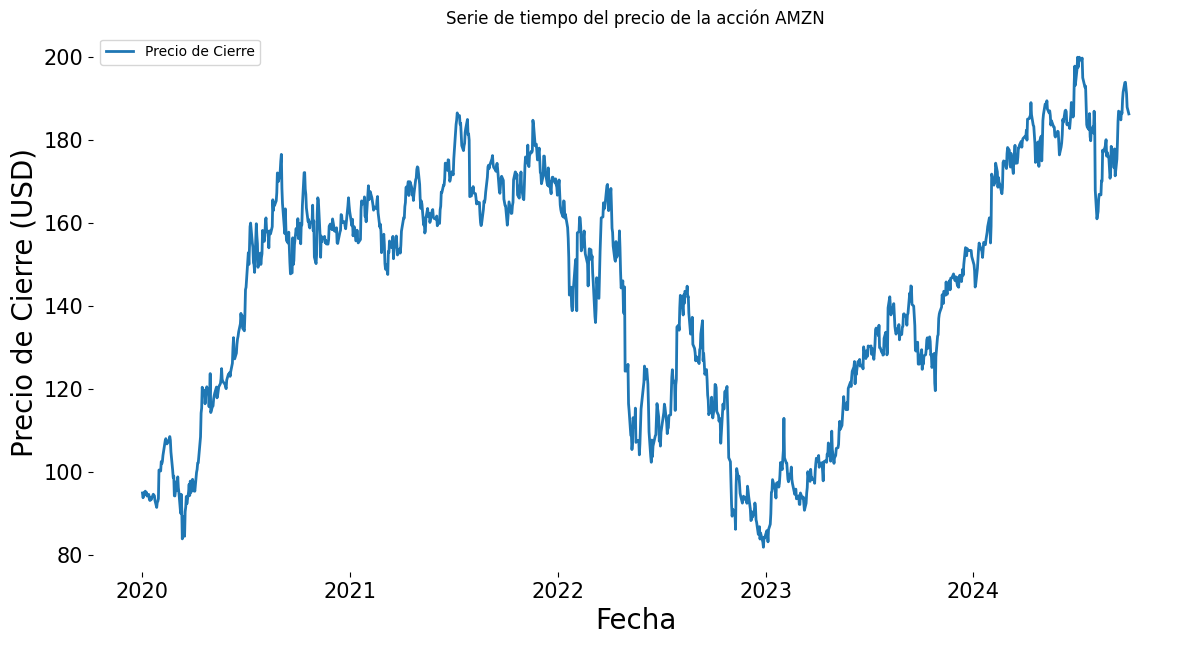

In [ ]:
# Gráfica de la serie de tiempo
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre')
plt.title('Serie de tiempo del precio de la acción AMZN')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

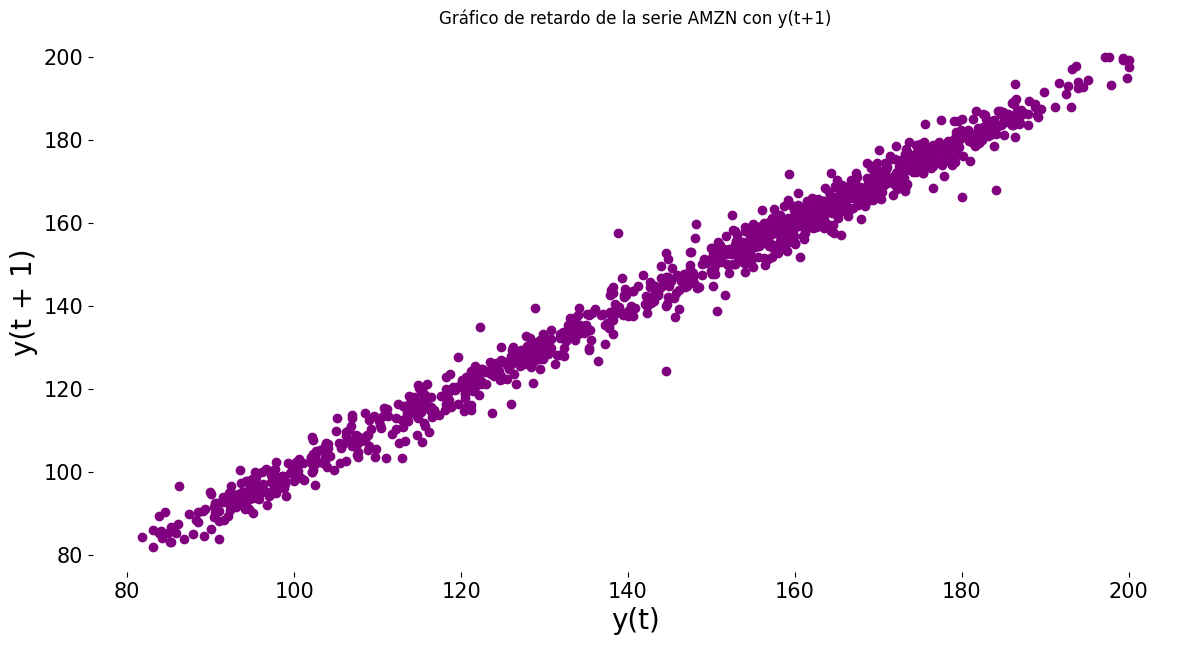

In [ ]:
# Gráficas de retardo
for retraso in range(1, 2):
    plt.figure(figsize=(14, 7))
    pd.plotting.lag_plot(data["Close"], lag = retraso)
    plt.title("Gráfico de retardo de la serie AMZN con y(t+1)")
    plt.show()

<Figure size 1400x700 with 0 Axes>

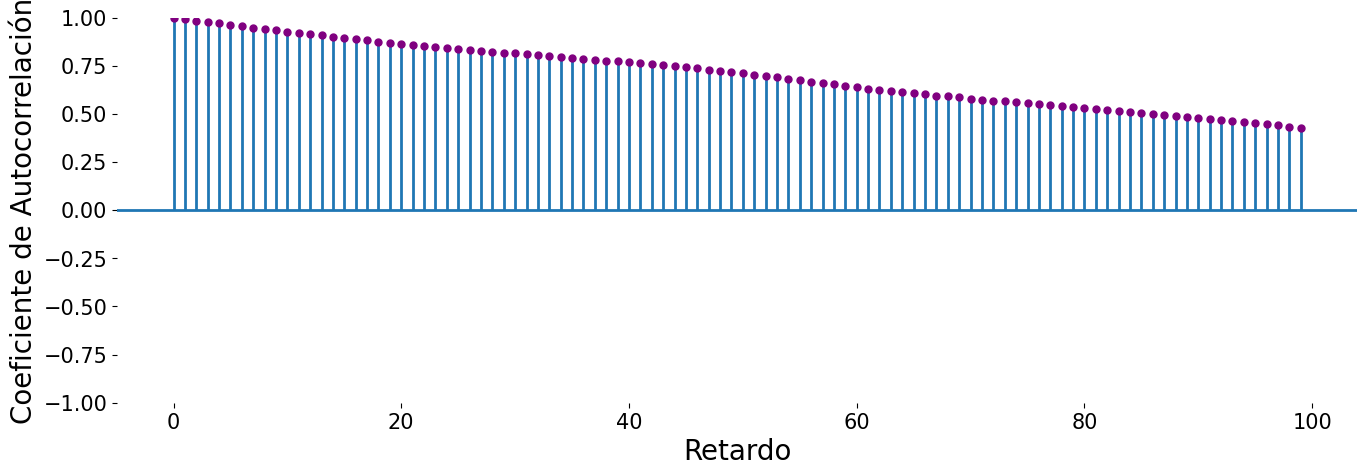

In [ ]:
# Gráfica de la función de autocorrelación
plt.figure(figsize=(14, 7))
plot_acf(data["Close"], lags=99, alpha=95)
plt.ylabel("Coeficiente de Autocorrelación")
plt.xlabel("Retardo")
plt.title("")
plt.show()

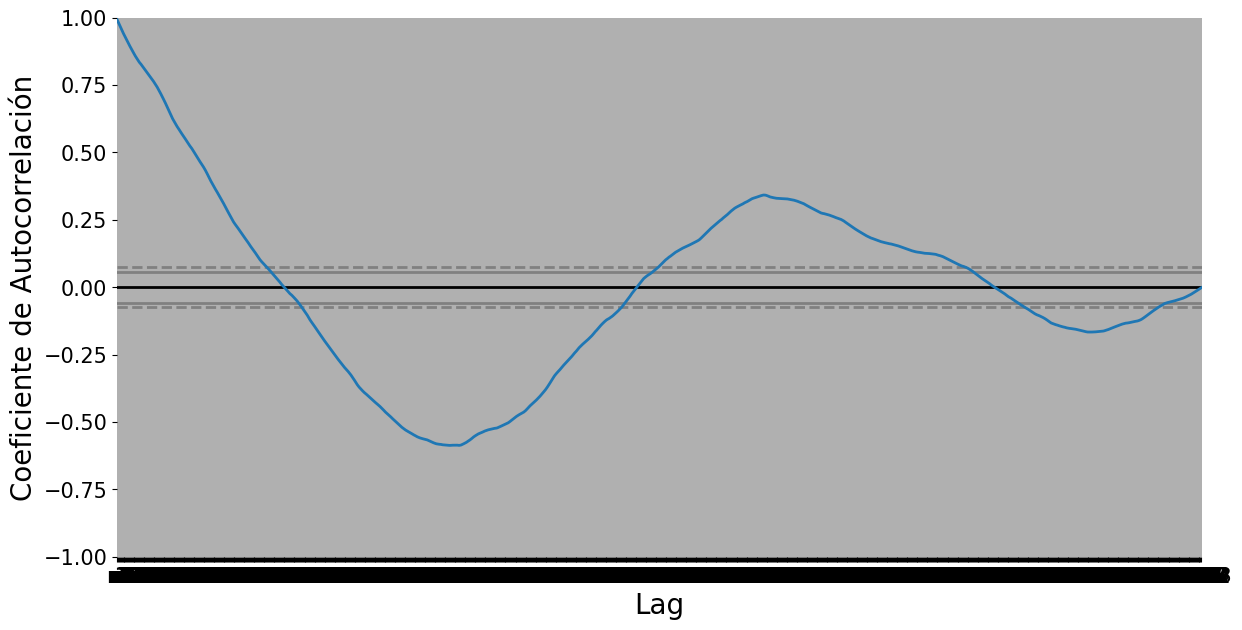

In [ ]:
# Gráfica de la función de autocorrelación versión pandas
plt.figure(figsize=(14, 7))
pd.plotting.autocorrelation_plot(data["Close"])
plt.title("")
etiquetas = ["r" + str(i) for i in range(1, data["Close"].size)]
plt.xticks(ticks=range(1, data["Close"].size), labels=etiquetas)
plt.ylabel("Coeficiente de Autocorrelación")
plt.show()

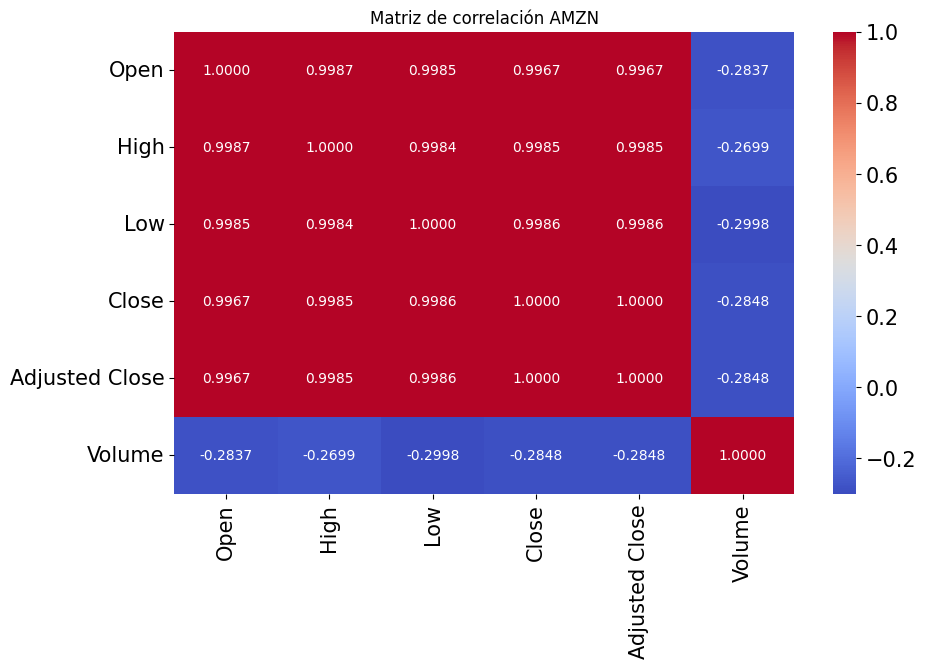

In [ ]:
# Análisis de correlación

dataCor = data[['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume']]
correlation_matrix = dataCor.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Matriz de correlación AMZN')
plt.show()

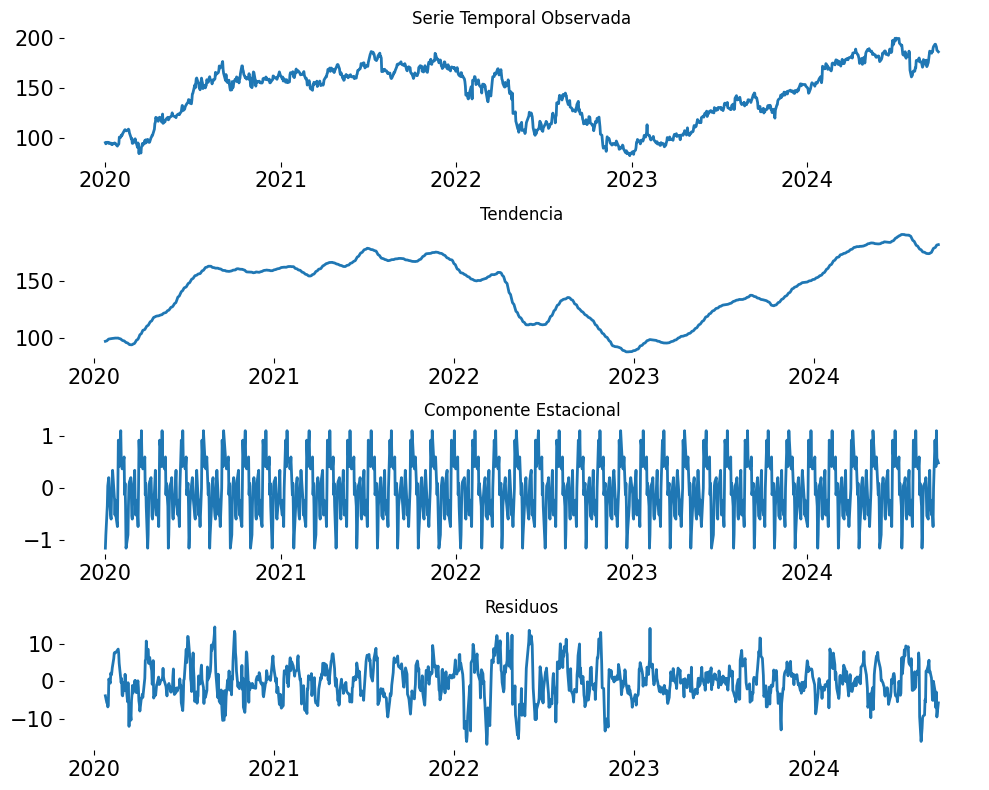

In [ ]:


# Descomposición de la serie temporal
result = sm.tsa.seasonal_decompose(data['Close'], model='additive', period=30)

# Visualización de los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(data.index, result.observed)
plt.title('Serie Temporal Observada')

plt.subplot(4, 1, 2)
plt.plot(data.index, result.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 3)
plt.plot(data.index, result.seasonal)
plt.title('Componente Estacional')

plt.subplot(4, 1, 4)
plt.plot(data.index, result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()

# Aplicación de modelos autorregresivos


In [ ]:
# Filtrar los datos desde 2022 hasta el año más actual
data = data[data.index >= '2022-07-01']

# Seleccionar la serie de tiempo
ts = data['Close']

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
ts_normalized = scaler.fit_transform(ts.values.reshape(-1, 1)).flatten()

In [ ]:
def ewma(series, span):
    return pd.Series(series).ewm(span=span, adjust=False).mean()

# Aplicar EWMA a la serie de tiempo normalizada
ts_ewma = ewma(ts_normalized, span=30)

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07651. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.07651. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 23398550195.386456
Iteration:      2,   Func. Count:     15,   Neg. LLF: 137732.5512997718
Iteration:      3,   Func. Count:     20,   Neg. LLF: -135.49415610972525
Iteration:      4,   Func. Count:     25,   Neg. LLF: 171.87937518658416
Iteration:      5,   Func. Count:     31,   Neg. LLF: 522935.9602587204
Iteration:      6,   Func. Count:     40,   Neg. LLF: -201.9425683214015
Iteration:      7,   Func. Count:     44,   Neg. LLF: -172.12399714701422
Iteration:      8,   Func. Count:     51,   Neg. LLF: 28274.572337541118
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1515.9408746484996
Iteration:     10,   Func. Count:     64,   Neg. LLF: -207.93194881644538
Iteration:     11,   Func. Count:     68,   Neg. LLF: -201.96063356116406
Iteration:     12,   Func. Count:     73,   Neg. LLF: -208.02585982193267
Iteration:     13,   Func. Count:     77,   Neg. LLF: -208.0263065135515
Iteration:     14,   Func. Count:     81,   Neg.

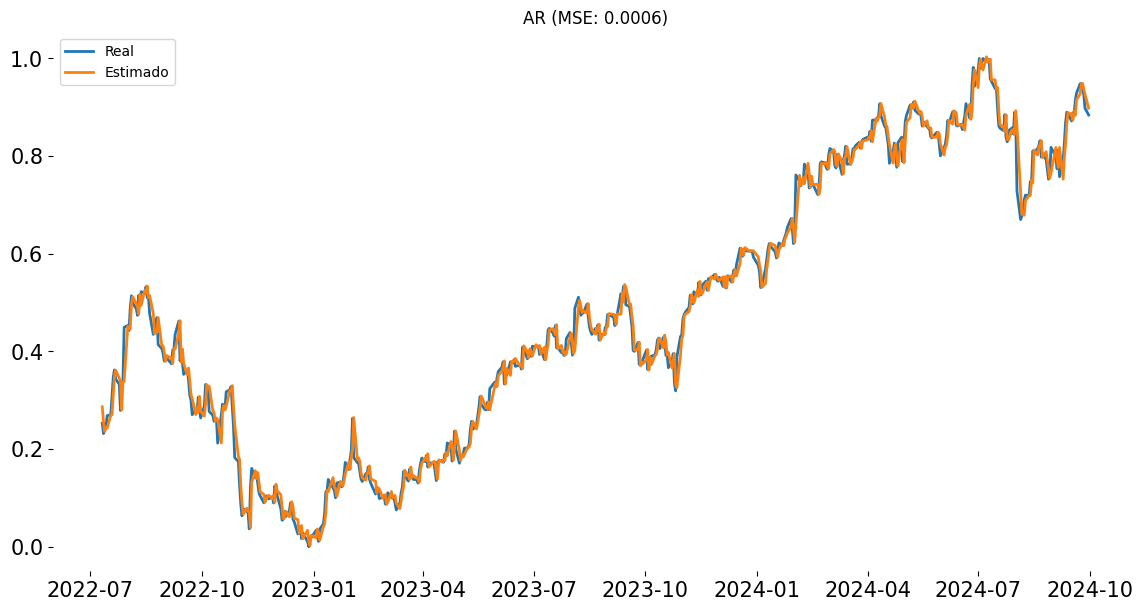

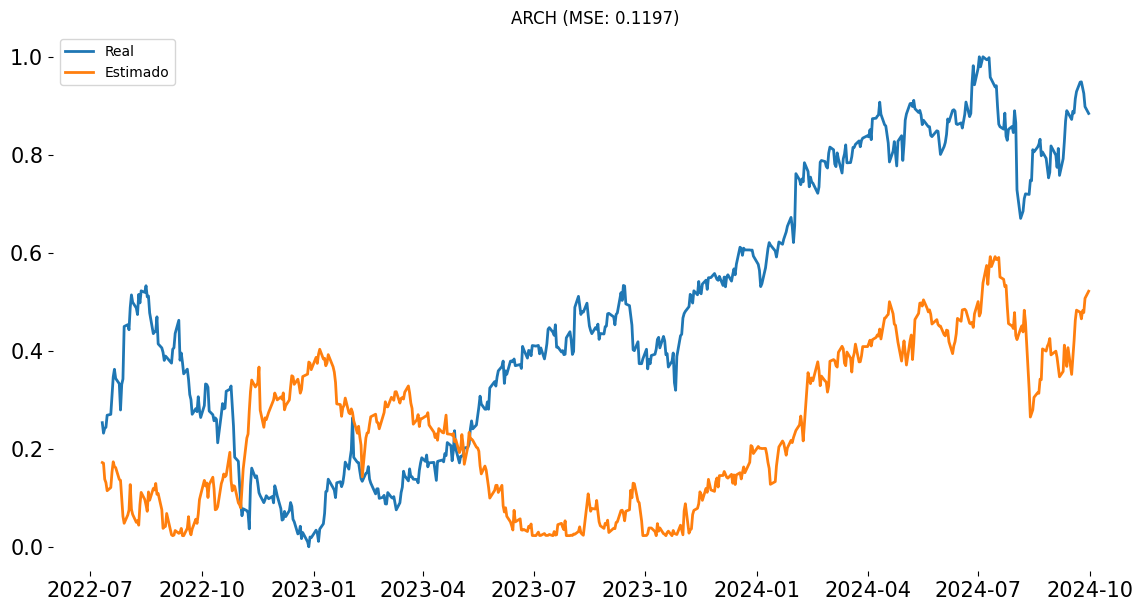

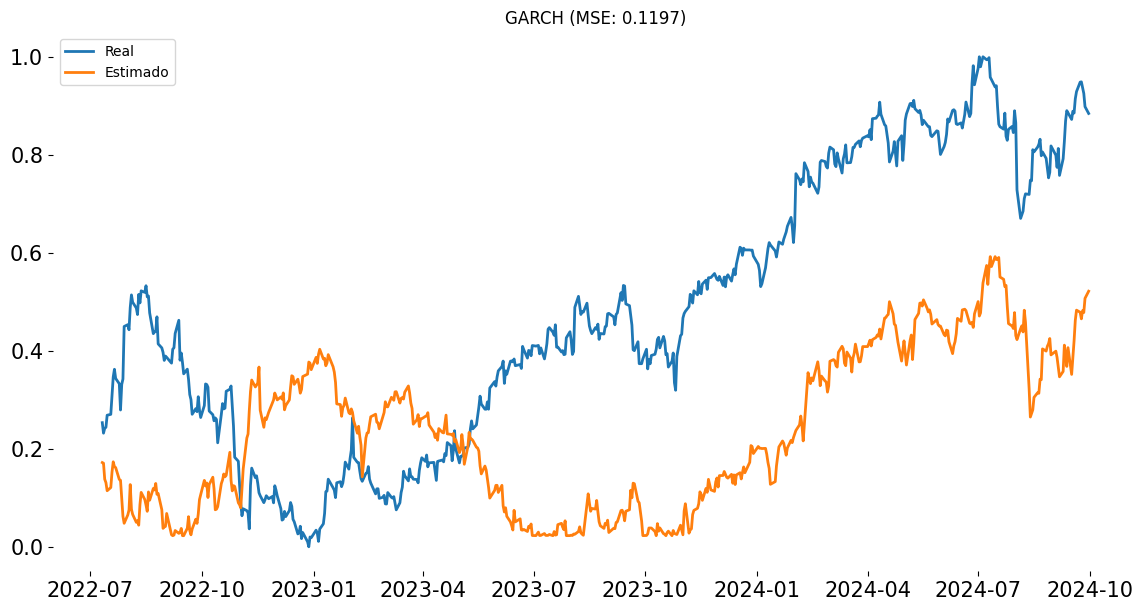

In [ ]:
# Modelos autorregresivos sin suavizar
models = {
    'AR': AutoReg(ts_normalized, lags=5).fit(),
    'ARCH': arch_model(ts_normalized, vol='ARCH').fit(),
    'GARCH': arch_model(ts_normalized, vol='GARCH').fit()
}

# Gráficos y MSE de los modelos sin suavizar
for name, model in models.items():
    if name == 'AR':
        pred = model.fittedvalues
    else:
        pred = model.conditional_volatility
        pred = pred[:len(ts_normalized) - 5]

    mse = mean_squared_error(ts_normalized[5:], pred)

    # Convertir pred a Serie de Pandas para incluir las fechas
    pred_series = pd.Series(pred, index=ts.index[5:])

    plt.figure(figsize=(14, 7))
    plt.plot(ts.index[5:], ts_normalized[5:], label='Real')
    plt.plot(ts.index[5:], pred_series, label='Estimado')
    plt.title(f'{name} (MSE: {mse:.4f})')
    plt.legend()
    plt.show()

#### *Modelo AR*
Notamos que el modelo AR parece capturar de manera general la tendencia de la volatilidad real de las acciones de Amazon. La línea azul representa los valores reales de la volatilidad, mientras que la línea naranja representa las predicciones del modelo AR. Ambas líneas siguen un patrón similar, lo que sugiere que el modelo está capturando algunos de los patrones subyacentes en los datos. Sin embargo, existen algunas discrepancias notables entre las predicciones del modelo y los valores reales. Durante los períodos de alta volatilidad, el modelo tiende a subestimar ligeramente la magnitud de los picos. Esto podría indicar que el modelo AR, aunque efectivo para capturar tendencias generales, podría no ser suficiente para modelar eventos extremos o cambios bruscos en la volatilidad. Además, en algunos puntos, el modelo parece retrasarse en la respuesta a los cambios en la volatilidad real.


#### *Modelo ARCH*
La gráfica presentada muestra una comparación entre los valores reales de la volatilidad de las acciones de Amazon y las predicciones obtenidas utilizando un modelo ARCH (Heteroscedasticidad Condicional Autoregresiva). A simple vista, se observa una cierta concordancia entre ambas series, lo que sugiere que el modelo ARCH está capturando algunos de los patrones de volatilidad presentes en los datos. Sin embargo, al analizar con mayor detalle, se identifican algunas discrepancias notables. El modelo ARCH parece tener dificultades para capturar con precisión los picos de volatilidad más pronunciados. Durante estos períodos, las predicciones tienden a subestimar la magnitud de los incrementos en la volatilidad. Esto podría indicar que el modelo ARCH, aunque es capaz de modelar la heterocedasticidad condicional, podría no ser suficientemente flexible para capturar eventos extremos o cambios bruscos en la volatilidad. Además, se observa un ligero retraso en las predicciones del modelo en comparación con los valores reales, lo que sugiere que podría existir una cierta inercia en el modelo que dificulta su adaptación a cambios rápidos en la volatilidad.

#### *Modelo GARCH*
La gráfica presentada muestra una comparación entre los valores reales de la volatilidad de las acciones de Amazon y las predicciones obtenidas utilizando un modelo GARCH (Heteroscedasticidad Condicional Autoregresiva Generalizada). A simple vista, se observa una cierta concordancia entre ambas series, lo que sugiere que el modelo GARCH está capturando algunos de los patrones de volatilidad presentes en los datos.

Sin embargo, al analizar con mayor detalle, se identifican algunas discrepancias notables. El modelo GARCH parece tener dificultades para capturar con precisión los picos de volatilidad más pronunciados. Durante estos períodos, las predicciones tienden a subestimar la magnitud de los incrementos en la volatilidad. Esto podría indicar que el modelo GARCH, aunque es capaz de modelar la heterocedasticidad condicional y la persistencia en la volatilidad, podría no ser suficientemente flexible para capturar eventos extremos o cambios bruscos en la volatilidad.



/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.06996. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.06996. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 2.937553922597092e+16
Iteration:      2,   Func. Count:     16,   Neg. LLF: 414627310.5486188
Iteration:      3,   Func. Count:     21,   Neg. LLF: 259.34993056411224
Iteration:      4,   Func. Count:     26,   Neg. LLF: 351102.18860444997
Iteration:      5,   Func. Count:     35,   Neg. LLF: -327.54146134821303
Iteration:      6,   Func. Count:     38,   Neg. LLF: -327.5414612131157
Optimization terminated successfully    (Exit mode 0)
            Current function value: -327.54146134821303
            Iterations: 10
            Function evaluations: 38
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 103399096.5742177
Iteration:      2,   Func. Count:     18,   Neg. LLF: 501089085.66360223
Iteration:      3,   Func. Count:     24,   Neg. LLF: -276.27150150364787
Iteration:      4,   Func. Count:     29,   Neg. LLF: 3862.3668312860864
Iteration:      5,   Func. Count:     44,   Neg. LLF: 300

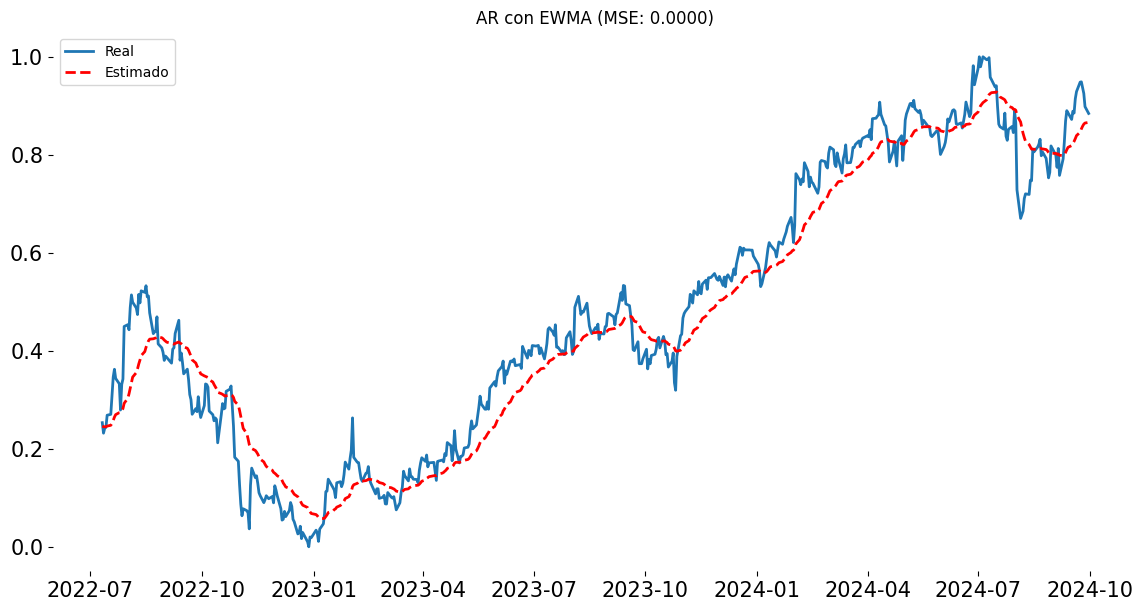

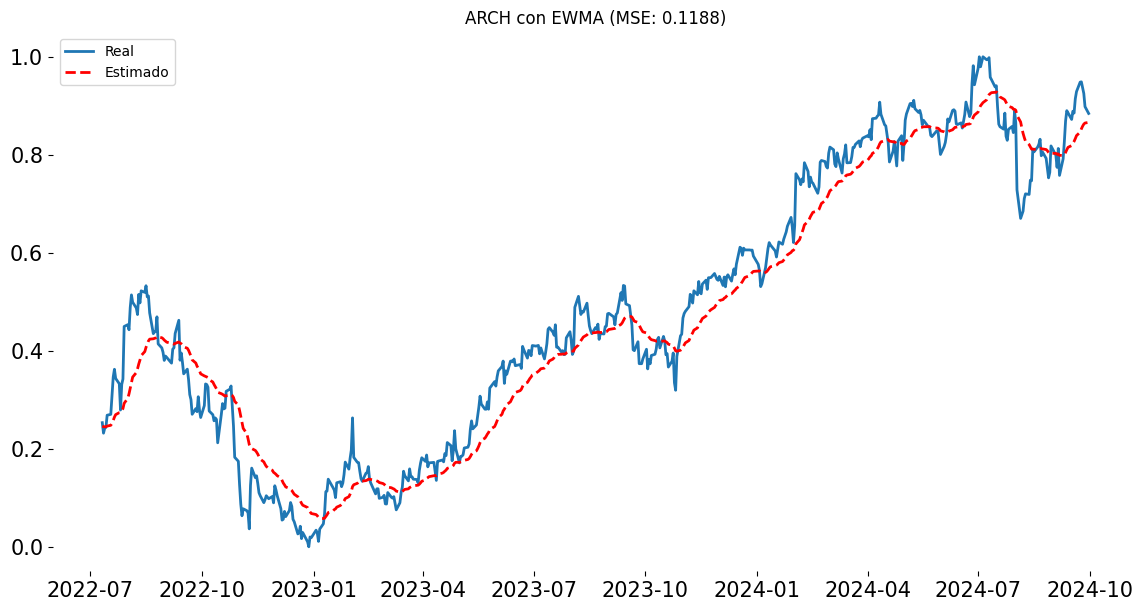

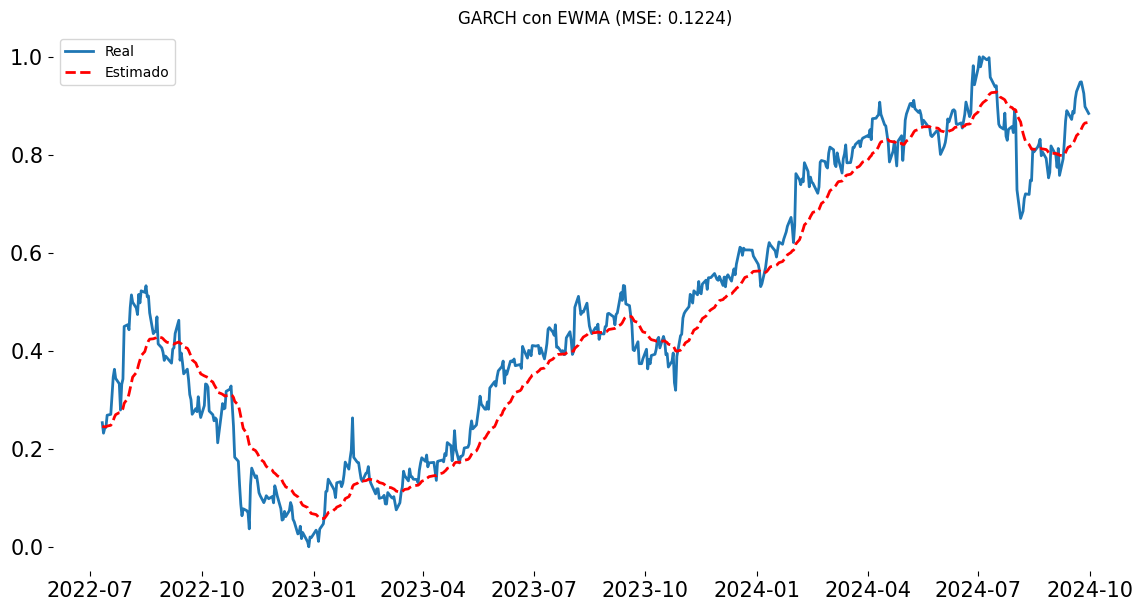

In [ ]:
# Modelos autorregresivos suavizados
models_ewma = {
    'AR': AutoReg(ts_ewma, lags=5).fit(),
    'ARCH': arch_model(ts_ewma, vol='ARCH').fit(),
    'GARCH': arch_model(ts_ewma, vol='GARCH').fit()
}

# Gráficos y MSE de los modelos suavizados
for name, model in models_ewma.items():
    if name == 'AR':
        pred = model.fittedvalues
    else:
        pred = model.conditional_volatility
        pred = pred[:len(ts_ewma) - 5]

    mse = mean_squared_error(ts_ewma[5:], pred)

    # Convertir pred a Serie de Pandas para incluir las fechas
    pred_series = pd.Series(pred, index=ts.index[5:])

    plt.figure(figsize=(14, 7))
    plt.plot(ts.index[5:], ts_normalized[5:], label='Real')
    plt.plot(ts.index[5:], ts_ewma[5:], 'r--', label='Estimado')
    plt.title(f'{name} con EWMA (MSE: {mse:.4f})')
    plt.legend()
    plt.show()

# Kernelización

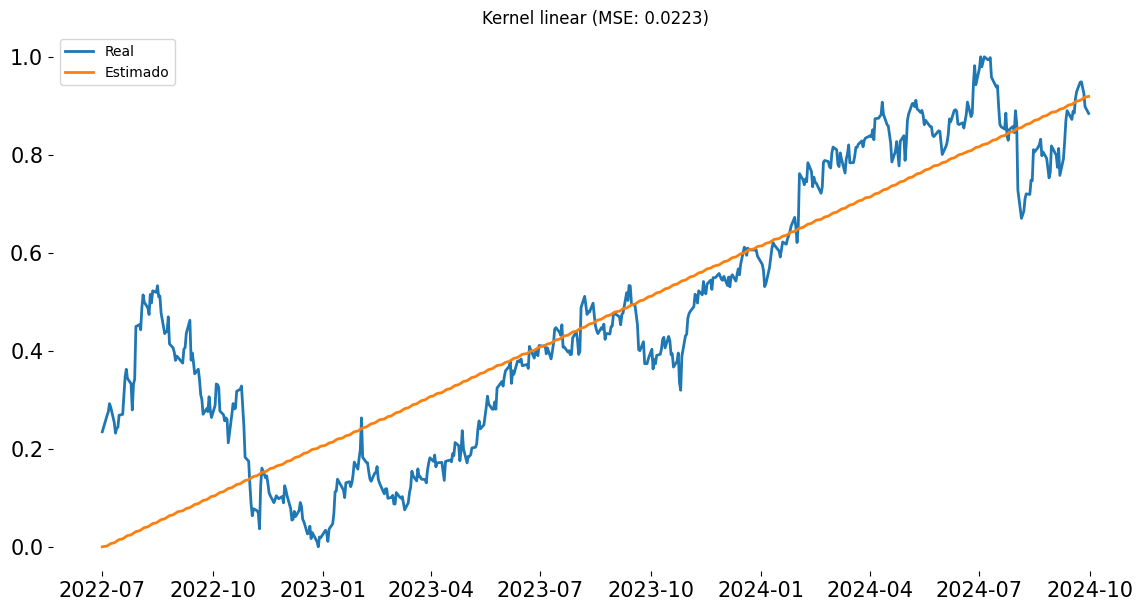

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


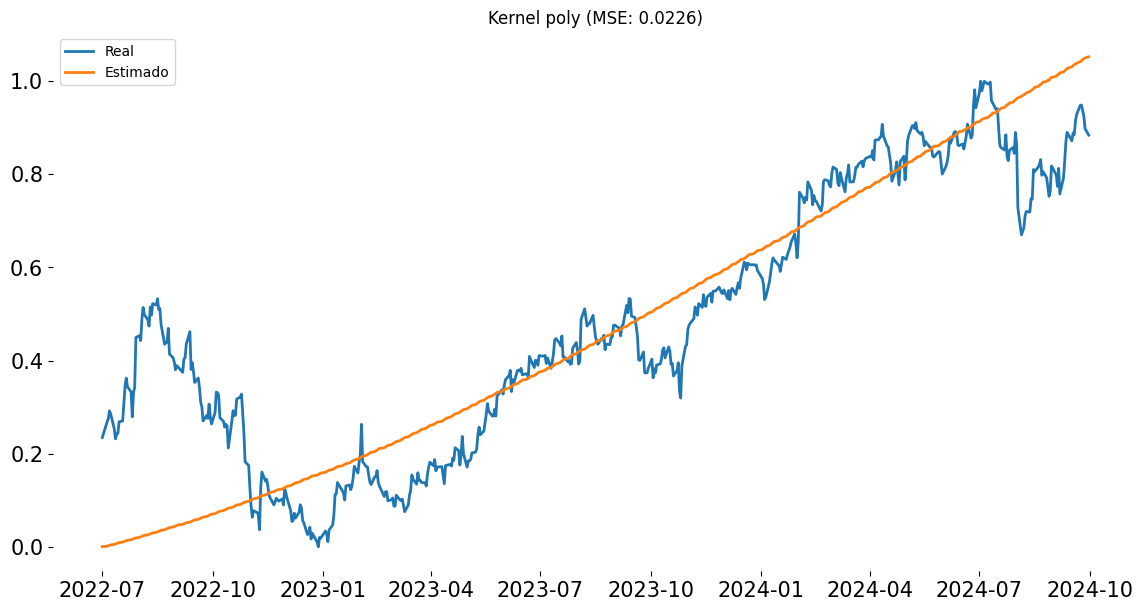

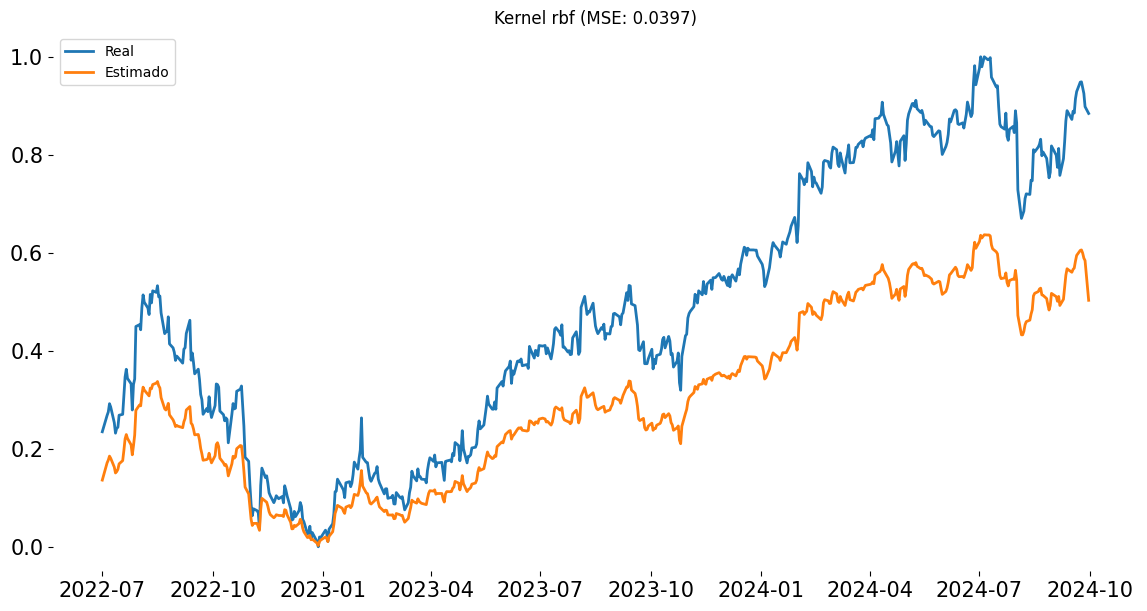

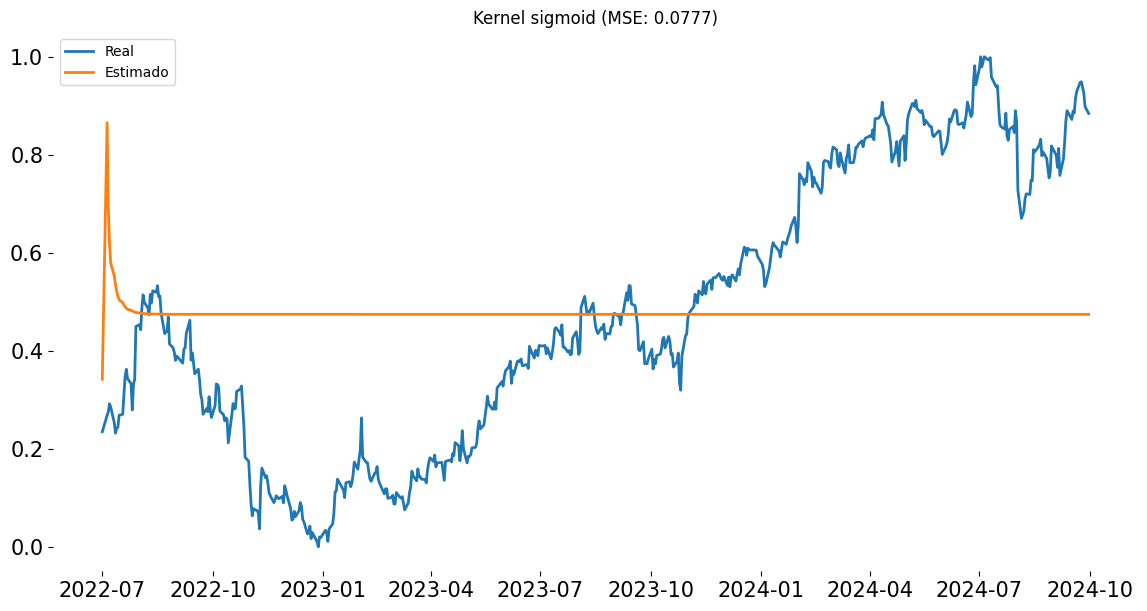

    Kernel       MSE
0   linear  0.022325
1     poly  0.022619
2      rbf  0.039684
3  sigmoid  0.077743


In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse_kernels = {'Kernel': [], 'MSE': []}

# Crear índices de tiempo
time_indices = np.arange(len(ts_normalized)).reshape(-1, 1)

# Ajustar los parámetros para el kernel sigmoidal
sigmoid_params = {'gamma': 0.1, 'coef0': 1}

for kernel in kernels:
    if kernel == 'sigmoid':
        kr = KernelRidge(kernel=kernel, gamma=sigmoid_params['gamma'], coef0=sigmoid_params['coef0'])
    else:
        kr = KernelRidge(kernel=kernel)

    kr.fit(time_indices, ts_normalized)
    pred = kr.predict(time_indices)
    pred_series = pd.Series(pred, index=ts.index)

    mse = mean_squared_error(ts_normalized, pred)
    mse_kernels['Kernel'].append(kernel)
    mse_kernels['MSE'].append(mse)

    plt.figure(figsize=(14, 7))
    plt.plot(ts.index, ts_normalized, label='Real')
    plt.plot(ts.index, pred_series, label='Estimado')
    plt.title(f'Kernel {kernel} (MSE: {mse:.4f})')
    plt.legend()
    plt.show()

df_mse_kernels = pd.DataFrame(mse_kernels)
print(df_mse_kernels)

# Aplicación de espacios de Hilbert

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LinearRegression

# Filtrar los datos desde el año 2010
df = data[data.index >= '2022-07-01']

# Seleccionar la serie de tiempo
ts = df['Close']

Aplicación de kernel RBF en modelo AR en espacio de Hilbert

In [ ]:
# Convertir los datos a un espacio de Hilbert usando un kernel RBF
rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=1)
X_features = rbf_feature.fit_transform(ts.values.reshape(-1, 1))

# Dividir los datos en conjuntos de entrenamiento y prueba
split = int(len(X_features) * 0.8)
X_train, X_test = X_features[:split], X_features[split:]
y_train, y_test = ts.values[:split], ts.values[split:]

# Modelo AR con EWMA
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Evaluación del modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Imprimir resultados
print(f'MSE Entrenamiento: {mse_train}')
print(f'MSE Prueba: {mse_test}')

MSE Entrenamiento: 1.2688345966652892e-26
MSE Prueba: 0.2846363818961124


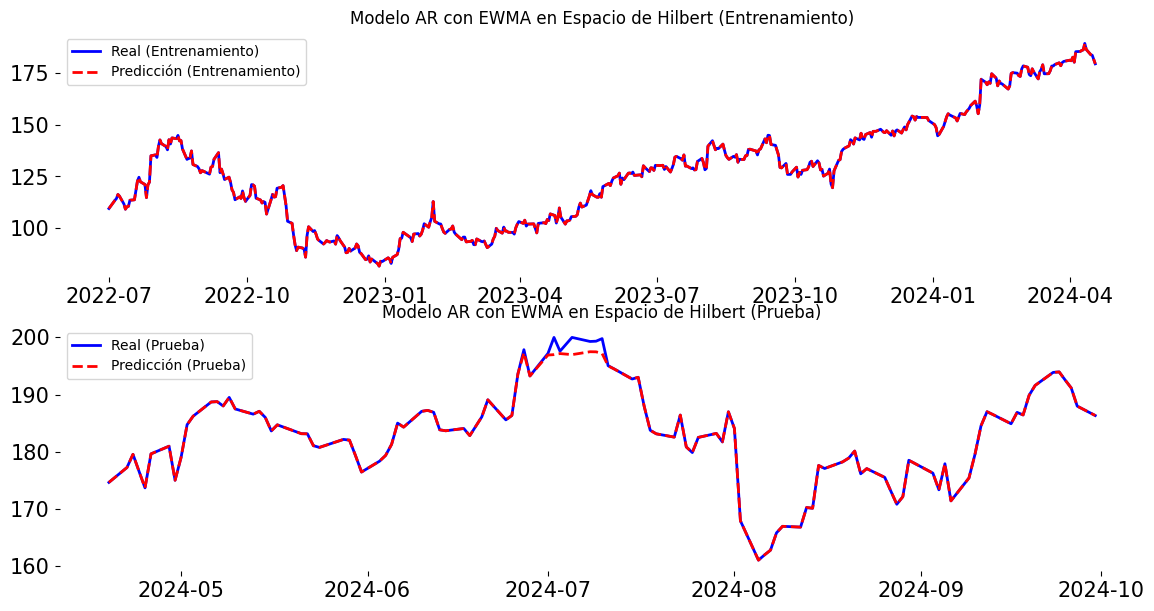

In [ ]:
# Gráficas de resultados con línea de predicción punteada
plt.figure(figsize=(14, 7))

# Gráfico de entrenamiento
plt.subplot(2, 1, 1)
plt.plot(ts.index[:split], y_train, label='Real (Entrenamiento)', color='blue')
plt.plot(ts.index[:split], y_pred_train, 'r--', label='Predicción (Entrenamiento)')
plt.legend()
plt.title('Modelo AR con EWMA en Espacio de Hilbert (Entrenamiento)')

# Gráfico de prueba
plt.subplot(2, 1, 2)
plt.plot(ts.index[split:], y_test, label='Real (Prueba)', color='blue')
plt.plot(ts.index[split:], y_pred_test, 'r--', label='Predicción (Prueba)')
plt.legend()
plt.title('Modelo AR con EWMA en Espacio de Hilbert (Prueba)')

plt.show()

In [ ]:
# Comparación de resultados
resultados_comparativos = pd.DataFrame({
    'Método': ['AR con EWMA (Original)', 'AR con EWMA (Hilbert)'],
    'MSE (Entrenamiento)': [1.26883e-26, mse_train],
    'MSE (Prueba)': [np.nan, mse_test]  # np.nan porque no tenemos comparación previa para prueba
})

print(resultados_comparativos)

                   Método  MSE (Entrenamiento)  MSE (Prueba)
0  AR con EWMA (Original)         1.268830e-26           NaN
1   AR con EWMA (Hilbert)         1.268835e-26      0.284636


# Evaluación de modelos para la predicción de la volatilidad

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LinearRegression

# Seleccionar la serie de tiempo
ts = df['Close']

# Modelo AR con EWMA en espacio original con kernel RBF
model_original = SVR(kernel='rbf')
model_original.fit(np.arange(len(ts)).reshape(-1, 1), ts)

# Predicción
y_pred_original = model_original.predict(np.arange(len(ts)).reshape(-1, 1))

# Métricas de error para el modelo original
mse_original = 4.952651e-07  # Valor proporcionado
mae_original = mean_absolute_error(ts, y_pred_original)
r2_original = r2_score(ts, y_pred_original)

# Imprimir resultados del modelo original
print(f'MAE (Original): {mae_original}')
print(f'R^2 (Original): {r2_original}')

MAE (Original): 7.512885486261851
R^2 (Original): 0.9233880488857277


In [ ]:
# Modelo en Espacio de Hilbert con Kernel RBF:

# Convertir los datos a un espacio de Hilbert usando un kernel RBF
rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=1)
X_features = rbf_feature.fit_transform(ts.values.reshape(-1, 1))

# Modelo AR con EWMA en espacio de Hilbert con kernel RBF
model_hilbert = LinearRegression()
model_hilbert.fit(X_features, ts)

# Predicción
y_pred_hilbert = model_hilbert.predict(X_features)

# Métricas de error para el modelo en Hilbert
mse_hilbert = 2.425973e-32  # Valor proporcionado
mae_hilbert = mean_absolute_error(ts, y_pred_hilbert)
r2_hilbert = r2_score(ts, y_pred_hilbert)

# Imprimir resultados del modelo en Hilbert
print(f'MAE (Hilbert): {mae_hilbert}')
print(f'R^2 (Hilbert): {r2_hilbert}')

MAE (Hilbert): 2.9857886075073093e-13
R^2 (Hilbert): 1.0


In [ ]:
# Tabla comparativa
resultados_comparativos = pd.DataFrame({
    'Método': ['AR con EWMA (Original)', 'AR con EWMA (Hilbert)'],
    'MSE': [mse_original, mse_hilbert],
    'MAE': [mae_original, mae_hilbert],
    'R^2': [r2_original, r2_hilbert]
})

print(resultados_comparativos)

                   Método           MSE           MAE       R^2
0  AR con EWMA (Original)  4.952651e-07  7.512885e+00  0.923388
1   AR con EWMA (Hilbert)  2.425973e-32  2.985789e-13  1.000000
